In [ ]:
# Mouse retina neuron development
## Statistical inference of cell-cell interaction by [CellphoneDB](https://cellphonedb.readthedocs.io)

In [1]:
import pandas as pd
import glob
import os
import sys
from IPython.display import HTML, display
from cellphonedb.utils import db_releases_utils

display(HTML(db_releases_utils.get_remote_database_versions_html()['db_releases_html_table']))

In [2]:
pd.set_option('display.max_columns', 100)
os.chdir('/home/datadisk/zlg/singlecell/stemcell_cycle_differentiation/mouse retinal development')

## Load data

The processed data can be dowmloaded from dropbox, [mouse_retina_meta.tsv](https://www.dropbox.com/scl/fi/3uj4a1l1u78cwdhxss7qn/mouse_retina_meta.tsv?rlkey=2vjl833dctu53pmpyijc5xy6m&st=dffpinlp&dl=0)
and [mouse_retina_cellcommun.h5ad](https://www.dropbox.com/scl/fi/uwot5dn6wy6mwqs6dqclt/mouse_retina_cellcommun.h5ad?rlkey=n0q7gw5k709bm87msz1ei1j3i&st=8hkk8wo8&dl=0).

In [3]:
cpdb_file_path = '/home/datadisk/zlg/singlecell/cellphonedb_database/v5.0.0/cellphonedb.zip'
meta_file_path = 'mouse_retina_meta.tsv'
counts_file_path = 'mouse_retina_cellcommun.h5ad'
degs_file_path = 'mouse_retina_DEGs.tsv'

In [4]:
out_path = 'cell_communication/v5.0.0/method'

## Running CellphoneDB whith Statistical inference of interaction specificity

In [5]:
from cellphonedb.src.core.methods import cpdb_statistical_analysis_method

deconvoluted, means, pvalues, significant_means = cpdb_statistical_analysis_method.call(
    cpdb_file_path = cpdb_file_path,                 # mandatory: CellPhoneDB database zip file.
    meta_file_path = meta_file_path,                 # mandatory: tsv file defining barcodes to cell label.
    counts_file_path = counts_file_path,             # mandatory: normalized count matrix.
    counts_data = 'hgnc_symbol',                     # defines the gene annotation in counts matrix.
    #microenvs_file_path = microenvs_file_path,       # optional (default: None): defines cells per microenvironment.
    iterations = 1000,                               # denotes the number of shufflings performed in the analysis.
    threshold = 0.1,                                 # defines the min % of cells expressing a gene for this to be employed in the analysis.
    threads = 40,                                     # number of threads to use in the analysis.
    debug_seed = 42,                                 # debug randome seed. To disable >=0.
    result_precision = 3,                            # Sets the rounding for the mean values in significan_means.
    pvalue = 0.05,                                   # P-value threshold to employ for significance.
    subsampling = False,                             # To enable subsampling the data (geometri sketching).
    subsampling_log = False,                         # (mandatory) enable subsampling log1p for non log-transformed data inputs.
    subsampling_num_pc = 100,                        # Number of componets to subsample via geometric skectching (dafault: 100).
    subsampling_num_cells = 1000,                    # Number of cells to subsample (integer) (default: 1/3 of the dataset).
    separator = '|',                                 # Sets the string to employ to separate cells in the results dataframes "cellA|CellB".
    debug = False,                                   # Saves all intermediate tables employed during the analysis in pkl format.
    output_path = out_path,                          # Path to save results.
    output_suffix = None                             # Replaces the timestamp in the output files by a user defined string in the  (default: None).
    )

Reading user files...
The following user files were loaded successfully:
mouse_retina_cellcommun.h5ad
mouse_retina_meta.tsv
[ ][CORE][13/12/23-15:51:50][INFO] [Cluster Statistical Analysis] Threshold:0.1 Iterations:1000 Debug-seed:42 Threads:40 Precision:3
[ ][CORE][13/12/23-15:51:50][WARNING] Debug random seed enabled. Set to 42
[ ][CORE][13/12/23-15:51:52][INFO] Running Real Analysis
[ ][CORE][13/12/23-15:51:52][INFO] Running Statistical Analysis


100%|██████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 101.46it/s]


[ ][CORE][13/12/23-15:52:03][INFO] Building Pvalues result
[ ][CORE][13/12/23-15:52:03][INFO] Building results
Saved deconvoluted to cell_communication/v5.0.0/method/statistical_analysis_deconvoluted_12_13_2023_15:52:03.txt
Saved means to cell_communication/v5.0.0/method/statistical_analysis_means_12_13_2023_15:52:03.txt
Saved pvalues to cell_communication/v5.0.0/method/statistical_analysis_pvalues_12_13_2023_15:52:03.txt
Saved significant_means to cell_communication/v5.0.0/method/statistical_analysis_significant_means_12_13_2023_15:52:03.txt


In [8]:
import anndata
adata = anndata.read_h5ad(counts_file_path)

## Plotting results

[ktplotspy](https://ktplotspy.readthedocs.io) is a super light-weight python library for plotting CellphoneDB results

In [6]:
import ktplotspy as kpy
import matplotlib.pyplot as plt

### Heatmap

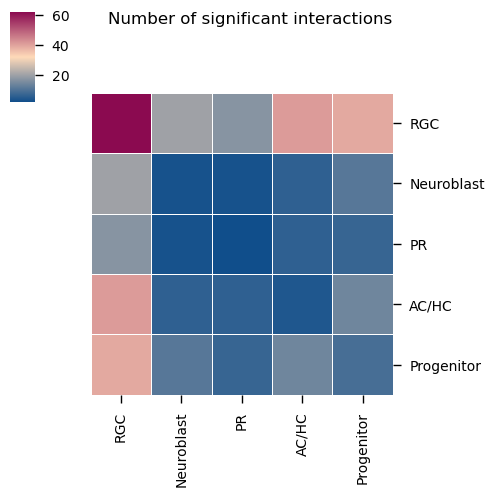

In [9]:
kpy.plot_cpdb_heatmap(
    adata = adata,
    pvals = pvalues,
    celltype_key = "Annotation",
    figsize = (5,5),
    title = "Number of significant interactions",
    symmetrical = True,
)

### Dot plot

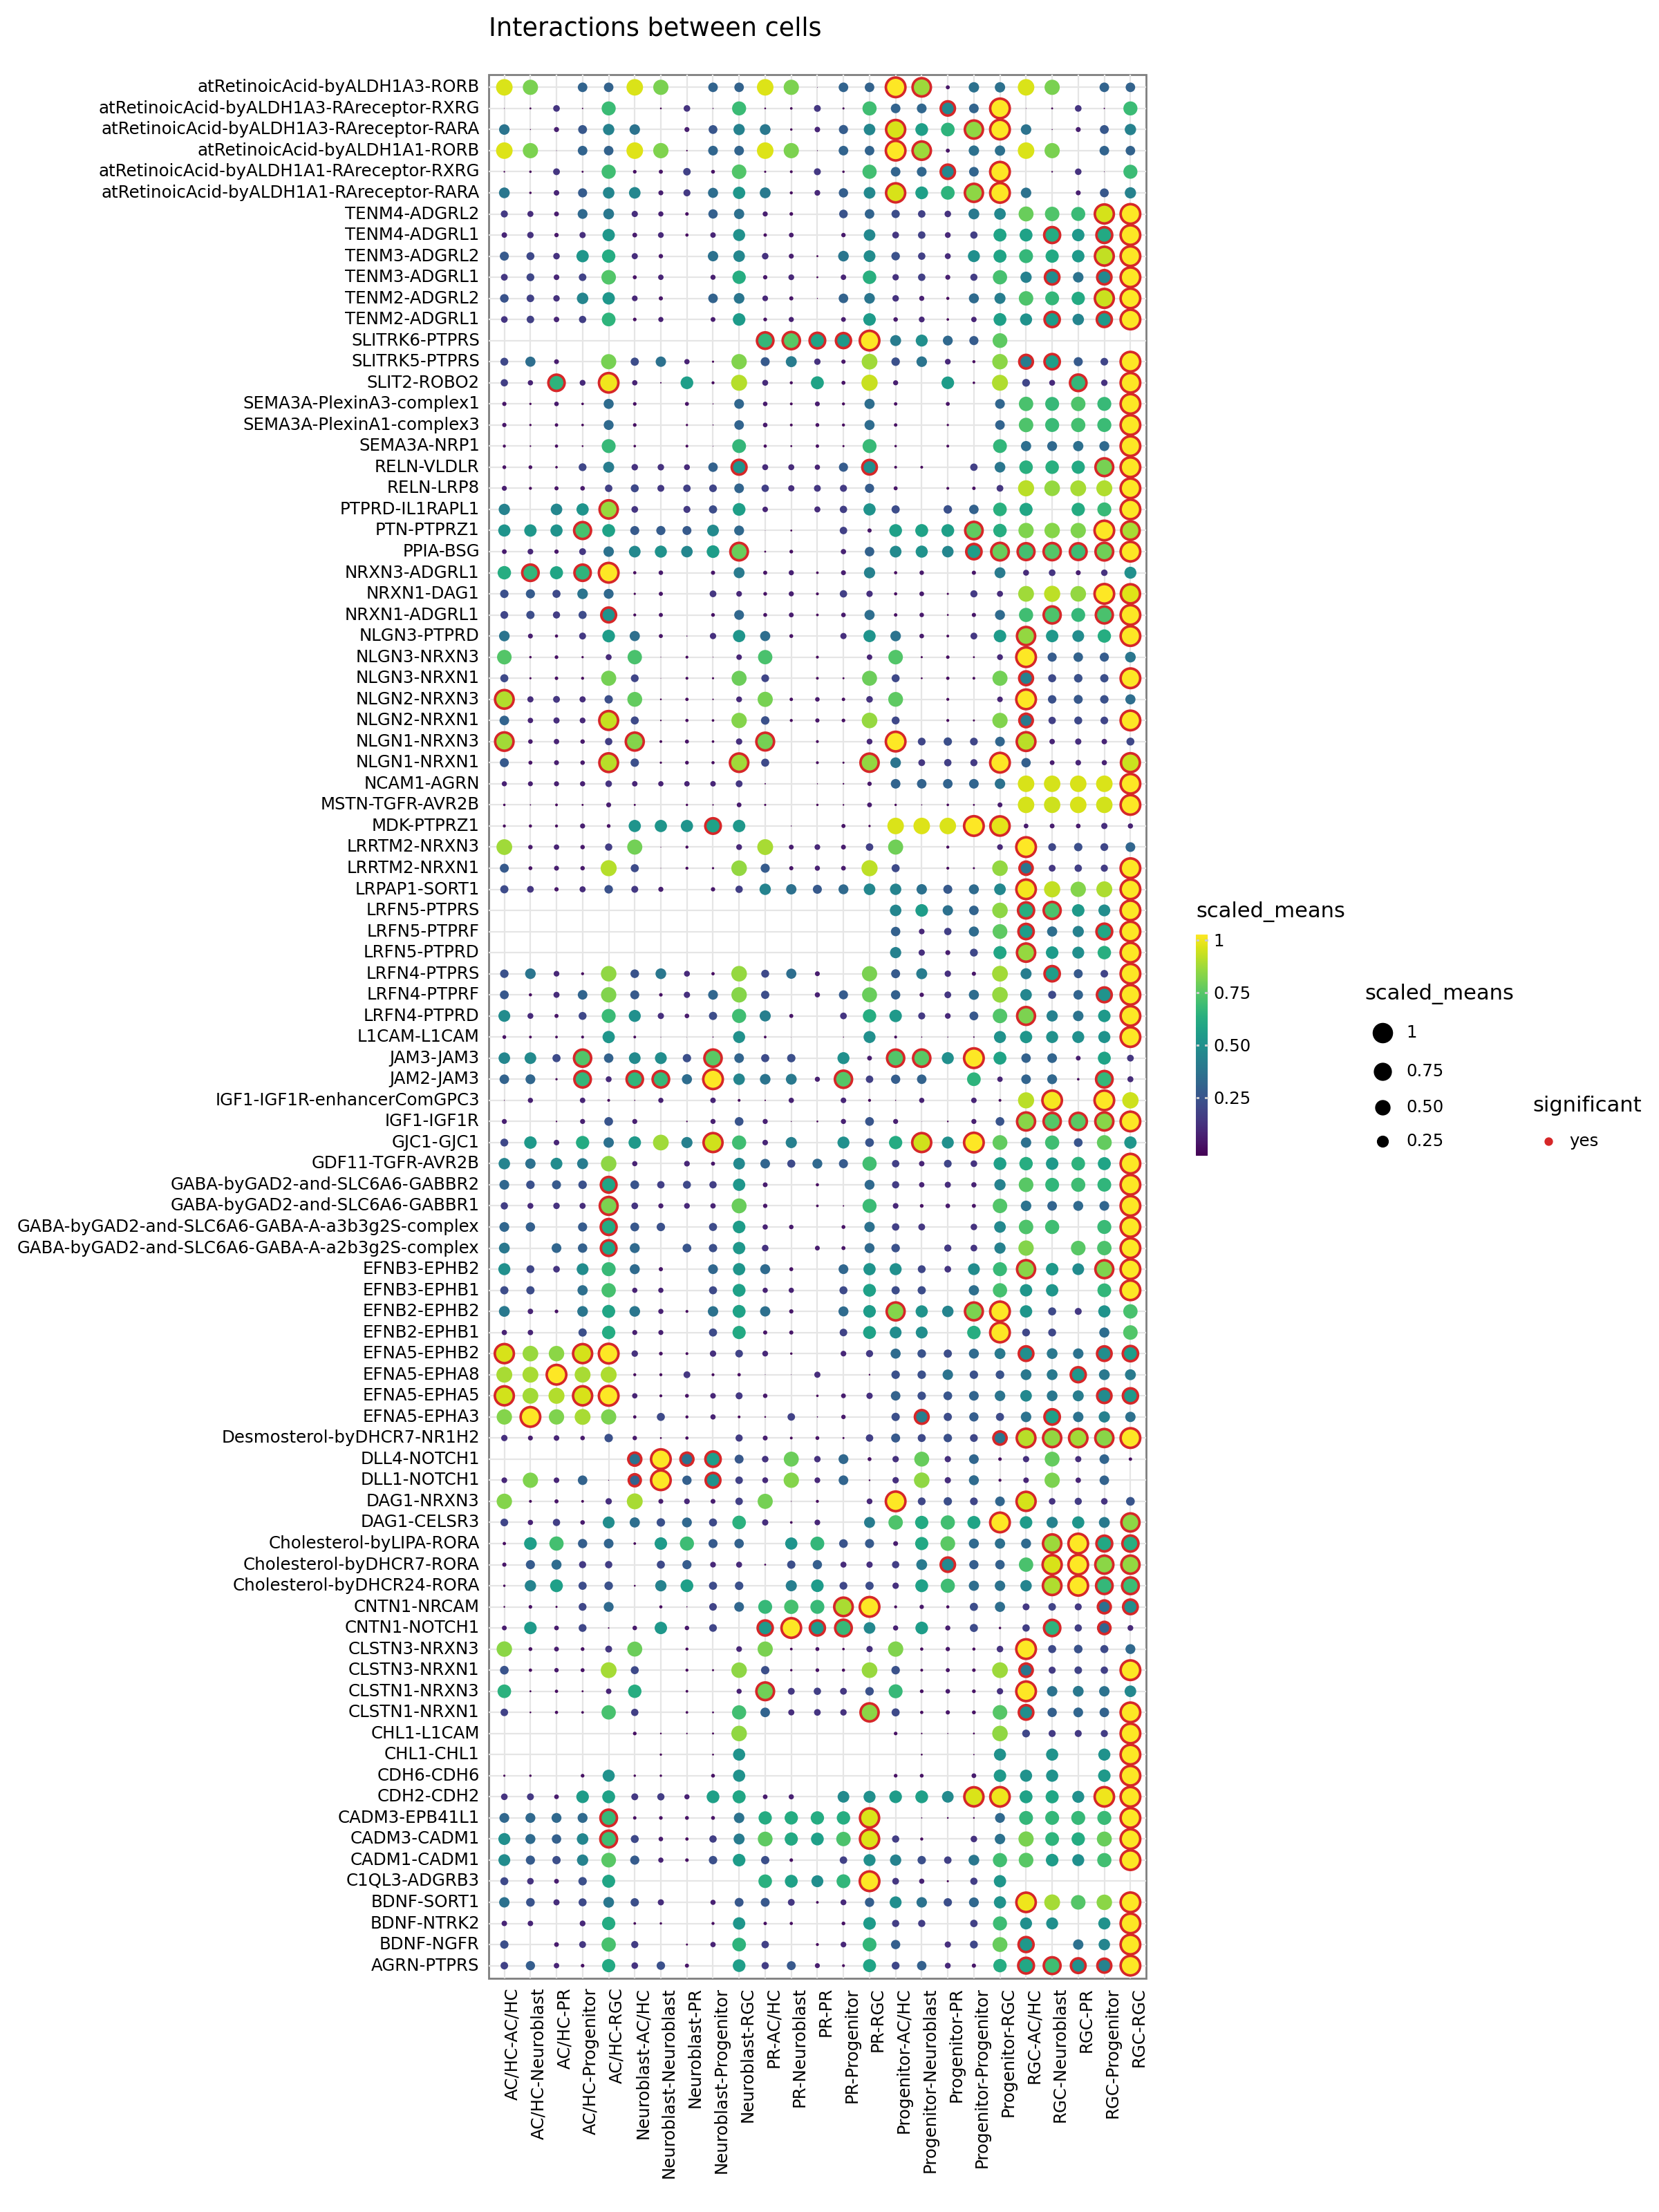

<Figure Size: (1200 x 1600)>

In [10]:
kpy.plot_cpdb(
    adata = adata,
    cell_type1 = "Progenitor|Neuroblast|PR|AC/HC|RGC",
    cell_type2 = "Progenitor|Neuroblast|PR|AC/HC|RGC", 
    means = means,
    pvals = pvalues,
    celltype_key = "Annotation",
    figsize = (12,16),
    title = "Interactions between cells ",
    max_size = 5,
    highlight_size = 0.75,
    standard_scale = True,
)